# Visión evolutiva de un equilibrio de Nash mixto
## (Monsalve, 2018, p. 70)

In [0]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import numpy as np
import random
import matplotlib.pyplot as plt
# from scipy import special, optimize

Gintis (2000) creó 100 jugadores tipo 1 y 100 jugadores tipo 2, donde cada uno estaba programado para jugar una sola estrategia pura, que le era asignada aleatoriamente. En cada ronda del juego, el jugador 1 y el jugador 2 son aleatoriamente emparejados a jugar el juego por una sola vez.

Cada cien rondas se lleva a cabo la "reproducción" consistente en eliminar el 5% de los jugadores de cada tipo con los más bajos *scores*, y reemplazarlos por el 5% de los jugadores con los más altos *scores*. Sin embargo, en cada ronda, con 1% de probabilidad, aparece en el juego un "mutante" utilizando cualquier estrategia. La simulación corre por 50.000 rondas

|   |  L  |     R    |     S    |   U  |
|:-:|:---:|:--------:|:--------:|:----:|
| T | 0,0 |    0,0   |   1,-1   | 1,-1 |
| B | 0,0 | 0.5,-0.5 | -0.5,0.5 |  0,0 |
| M | 0,0 | -0.5,0.5 | 1.5,-1.5 | 1,-1 |
| L | 0,0 |    0,0   |    0,0   |  0,0 |



In [0]:
jugadores = 100
repeticiones = 10000
j=4

In [0]:
def aleatorio(tipoJ,tamano=jugadores,l=1):
    """Generar números aleatorios en una columna"""
    prov = np.zeros(tamano).reshape(l,tamano)
    tipoJ[:, l] = tipoJ[:, l]*prov
    prov = np.random.rand(tamano).reshape(l,tamano)
    tipoJ[:, l] = tipoJ[:, l]+prov

In [0]:
j1 = np.zeros(j*jugadores).reshape(jugadores,j)
j2 = np.zeros(j*jugadores).reshape(jugadores,j)

In [0]:
i = 0
while (i<jugadores):
    j1[i,0] = i # Creación de 100 jugadores tipo 1
    j2[i,0] = i # Creación de 100 jugadores tipo 2
    i = i + 1

In [0]:
# Ordernar los jugadores
aleatorio(j1)
j1 = j1[np.argsort(j1[:, 1])]
aleatorio(j2)
j2 = j2[np.argsort(j2[:, 1])]

In [0]:
# Asignación de la estrategia pura para cada jugador
cuarto = jugadores//4

In [0]:
i = 0
while (i < jugadores):
    if i < cuarto:
        j1[i,2] = 0
    elif i < 2*cuarto:
        j1[i,2] = 1
    elif i < 3*cuarto:
        j1[i,2] = 2
    else:
        j1[i,2] = 3
    i = i +1

In [0]:
i = 0
while (i < jugadores):
    if i < cuarto:
        j2[i,2] = 0
    elif i < 2*cuarto:
        j2[i,2] = 1
    elif i < 3*cuarto:
        j2[i,2] = 2
    else:
        j2[i,2] = 3
    i = i +1

In [0]:
# Creación de la matriz de pagos
# Para el jugador 1
pago1 = np.array([
        [0, 0, 1, 1],
        [0, 0.5, -0.5, 0],
        [0, -0.5, 1.5, 1],
        [0, 0, 0, 0]
        ])
# Para el jugador 2
pago2 = np.array([
        [0, 0, -1, -1],
        [0, -0.5, 0.5, 0],
        [0, 0.5, -1.5, -1],
        [0, 0, 0, 0]
        ])

RanEstra = np.array([
        [0.0, 0.0],
        [1.0, 0.0],
        [2.0, 0.0],
        [3.0, 0.0]
        ])

In [0]:
estrategiasj1 = np.zeros(j*repeticiones).reshape(repeticiones,j)
estrategiasj2 = np.zeros(j*repeticiones).reshape(repeticiones,j)
# Luego de 100 rondas, elimino el 5% más bajo y los remplazo
# por el 5% de los jugadores con los más altos scores

In [0]:
ronda = 0
while (ronda < repeticiones):
    if (ronda != 0 and ronda%10000 == 0):
        print(ronda)
        
    if (ronda != 0 and ronda%100 == 0):
        j1 = j1[np.argsort(j1[:, 3])]
        j2 = j2[np.argsort(j2[:, 3])]
        porcentaje = int(jugadores*0.05)
        
        mejores = j1[jugadores-(porcentaje):(jugadores)]
        j1[0:porcentaje] = mejores
        mejores = j2[jugadores-(porcentaje):(jugadores)]
        j2[0:porcentaje] = mejores
    else:
        pass

    if(random.random()>0.99):
        aleatorio(j2)
        j2 = j2[np.argsort(j2[:, 1])]
        aleatorio(RanEstra,4)
        RanEstra = RanEstra[np.argsort(RanEstra[:, 1])]
        j2[0,2] = RanEstra[0,0]
    else:
        pass
    
    aleatorio(j1)
    j1 = j1[np.argsort(j1[:, 1])]
    aleatorio(j2)
    j2 = j2[np.argsort(j2[:, 1])]
    # print(j1[:,0],j2[:,0])
    
    i = 0
    while (i<jugadores):
        fila = int(j1[i,2])
        columna = int(j2[i,2])
        j1[i,3]=j1[i,3]+pago1[fila,columna]
        j2[i,3]=j2[i,3]+pago2[fila,columna]
        
        k = 0
        while (k<4):
            estrategiasj1[ronda,k] = np.count_nonzero(j1[:,2] == k)
            estrategiasj2[ronda,k] = np.count_nonzero(j2[:,2] == k)
            k = k+1
        # print(i)
        i = i +1
    ronda = ronda + 1

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000


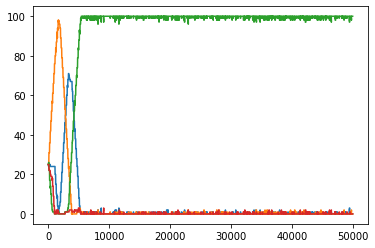

In [0]:
plt.plot(estrategiasj2)

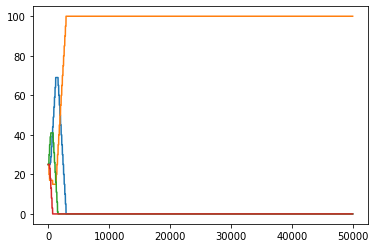

In [0]:
plt.plot(estrategiasj1)

## Bibliografía

*   Gintis, H. (2000). *Game theory evolving: A problem-centered introduction to modeling strategic behavior*. Princeton: Princeton university press.
*   Monsalve, S. (2018). *Competencia bajo equilibrio de Nash*. Bogotá: Centro Editorial FCE de la Universidad Nacional de Colombia.

